In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mlgrad.af as af
import mlgrad.func as func
import mlgrad.utils as utils
import mlgrad.pca as pca
import pandas as pd
import sklearn.datasets as datasets

In [80]:
X = datasets.make_low_rank_matrix(100, 10, effective_rank=2, tail_strength=0.1)

In [81]:
X0 = X
print(X0[:10])

[[ 0.02287938  0.08219346  0.03829527 -0.05158526  0.03917046  0.02252744
  -0.00672702  0.07442954 -0.0809054  -0.06624748]
 [ 0.00826222  0.02547741  0.00854536 -0.01884333  0.00606337  0.02369034
  -0.00955894  0.00492331 -0.00478375  0.00286047]
 [-0.00930925  0.07374498  0.03606292 -0.04083096  0.06156352  0.06282933
  -0.03581066  0.0492852  -0.05794914 -0.04446416]
 [-0.01636361 -0.01987325 -0.03186863  0.06667305 -0.00387171 -0.09205555
   0.0274931   0.00868869 -0.0894296   0.01744879]
 [ 0.02829942  0.00402201  0.00797761 -0.02569374 -0.01045212  0.00199704
  -0.00680475 -0.02820111  0.03405003  0.00092329]
 [-0.01955512 -0.014827   -0.0160366   0.02280887 -0.00734333 -0.01962795
   0.00238688 -0.02361818  0.00666696  0.01834585]
 [ 0.0615671   0.00431974  0.03027118 -0.0473295   0.012142   -0.00976542
   0.00662671  0.02781171 -0.01262183 -0.02762741]
 [-0.07293928  0.02284807 -0.03025062  0.03122089  0.00247879 -0.00506317
   0.00091966  0.01353452 -0.04094101  0.002104  ]


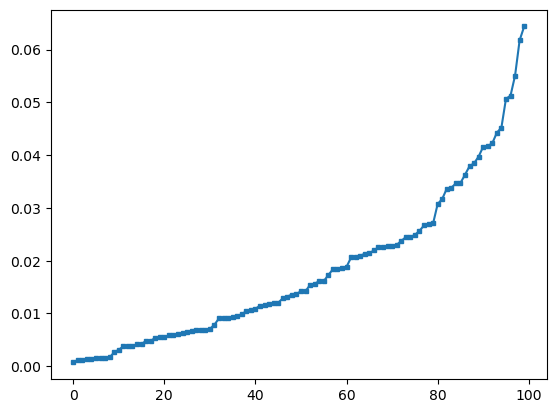

[ 0.00083016  0.01155846  0.00351274 -0.00675885  0.00877984  0.00197919
 -0.00177383  0.01230775 -0.01213536 -0.00863251]


In [82]:
c0 = pca.find_center(X0)
plt.plot(sorted(pca.distance_center(X0, c0)), marker='s', markersize=3)
plt.show()
print(c0)

0.85


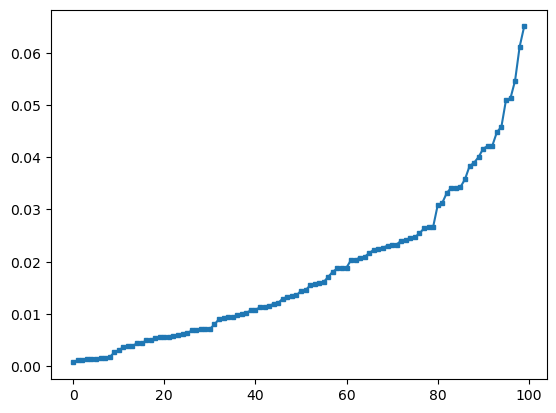

[ 0.00042418  0.01116313  0.00306562 -0.0058192   0.00853922  0.00137664
 -0.00168835  0.01171212 -0.01250804 -0.00816755]


In [83]:
N = len(X0)
alpha = (N - 15) / N
print(alpha)
wma = af.averaging_function("WM", rhofunc=func.Sqrt(0.1), alpha=alpha)
c = pca.find_rob_center(X0, wma)
plt.plot(sorted(pca.distance_center(X0, c)), marker='s', markersize=3)
plt.show()
print(c)

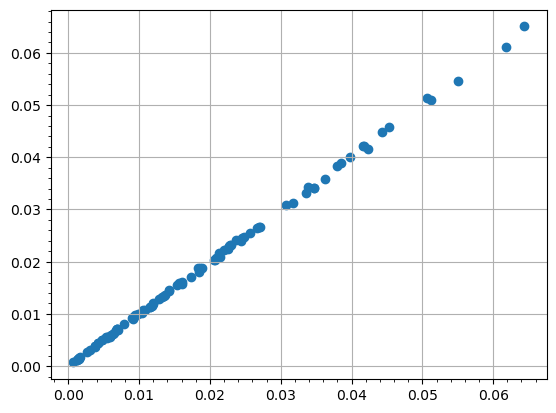

In [84]:
D0 = pca.distance_center(X0, c0)
D1 = pca.distance_center(X0, c)
plt.scatter(D0, D1)
plt.minorticks_on()
plt.grid(1)
plt.show()

In [85]:
X1 = X0 - c
X1_0 = X0 - c0

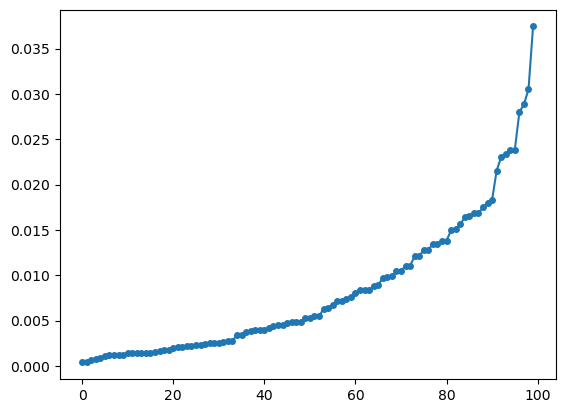

0.0098927892901837 [ 0.31665521  0.14022313  0.37445905 -0.53339377  0.21472528  0.48551821
 -0.12762921  0.06040249  0.27702504 -0.27716968]


In [86]:
a1_0, L1_0 = pca.find_pc(X1_0)
plt.plot(sorted(pca.distance_line(X1_0, a1_0)), marker='o', markersize=4)
plt.show()
print(L1_0, a1_0)

0.85


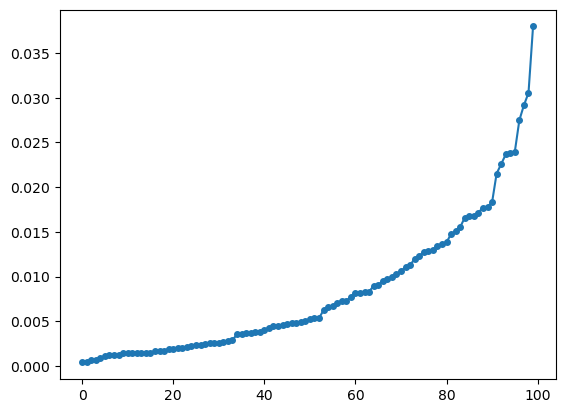

0.009876485370259508 [ 0.30935022  0.13641106  0.37625233 -0.53305113  0.21238614  0.48971553
 -0.12963138  0.05278351  0.28354086 -0.27398935]


In [87]:
N = len(X0)
alpha = (N - 15) / N
print(alpha)
wma = af.averaging_function("WM", rhofunc=func.Sqrt(0.1), alpha=alpha)
a1, L1 = pca.find_rob_pc(X1, wma)
plt.plot(sorted(pca.distance_line(X1, a1)), marker='o', markersize=4)
plt.show()
print(L1, a1)
U1 = pca.project_line(X1, a1)
U1_0 = pca.project_line(X1_0, a1_0)

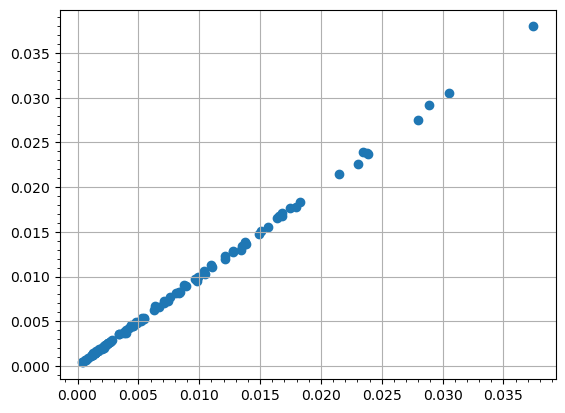

In [88]:
plt.scatter(pca.distance_line(X1_0, a1_0), pca.distance_line(X1, a1))
plt.minorticks_on()
plt.grid(1)
plt.show()

In [89]:
X2 = pca.project(X1, a1)
X2_0 = pca.project(X1_0, a1_0)

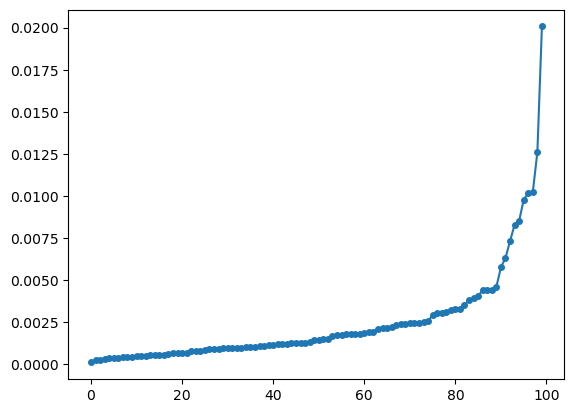

0.0058051100328639195 [-0.16909797  0.43598525  0.0192029  -0.0501083   0.27487101 -0.01582186
 -0.0523631   0.44789212 -0.66409224 -0.24139386]


In [90]:
a2_0, L2_0 = pca.find_pc(X2)
plt.plot(sorted(pca.distance_line(X2_0, a2_0)), marker='o', markersize=4)
plt.show()
print(L2_0, a2_0)

0.85


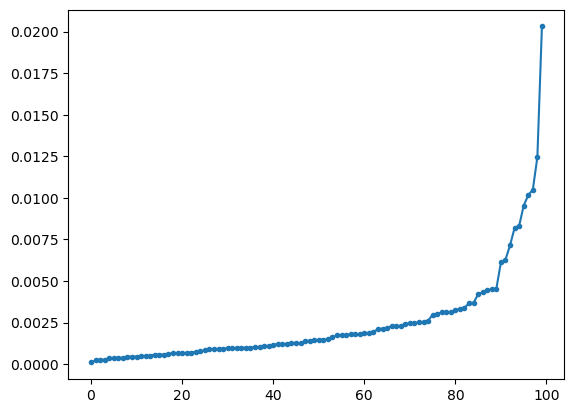

0.005882607008928793 [ 0.16161033 -0.43464445 -0.01967323  0.05048483 -0.27370875  0.01947318
  0.0515834  -0.44801292  0.66668151  0.24268129]


In [91]:
N = len(X0)
alpha = (N - 15) / N
print(alpha)
wma = af.averaging_function("WM", rhofunc=func.Sqrt(0.1), alpha=alpha)
a2, L2 = pca.find_rob_pc(X2, wma)
plt.plot(sorted(pca.distance_line(X2, a2)), marker='o', markersize=3)
plt.show()
print(L2, a2)
U2 = pca.project_line(X2, a2)
U2_0 = pca.project_line(X2_0, a2_0)

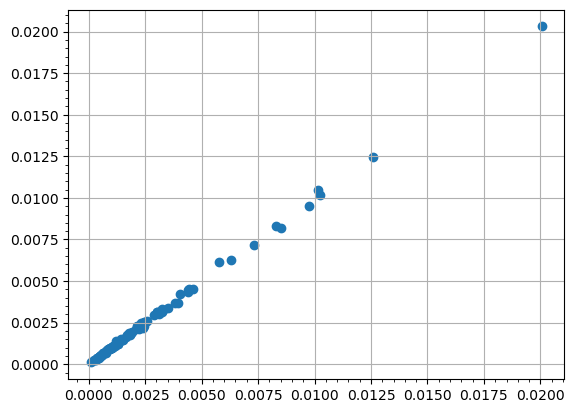

In [92]:
plt.scatter(pca.distance_line(X2_0, a2_0), pca.distance_line(X2, a2))
plt.minorticks_on()
plt.grid(1)
plt.show()

In [93]:
X3 = pca.project(X2, a2)
X3_0 = pca.project(X2_0, a2_0)

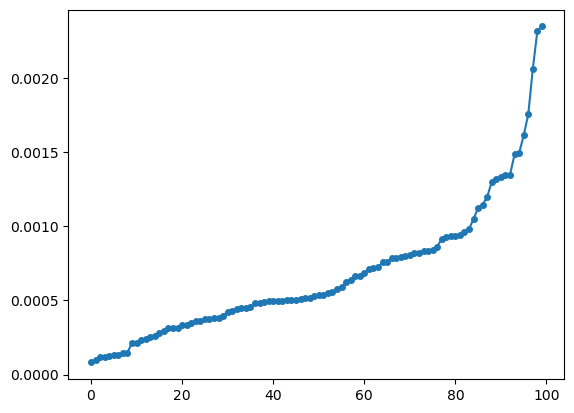

0.0017716471275462155 [-0.69438184  0.23177044 -0.00647229  0.21774546  0.15486719  0.47731586
 -0.25060428 -0.25227256  0.1622381   0.10991781]


In [94]:
a3_0, L3_0 = pca.find_pc(X3)
plt.plot(sorted(pca.distance_line(X3_0, a3_0)), marker='o', markersize=4)
plt.show()
print(L3_0, a3_0)

0.85


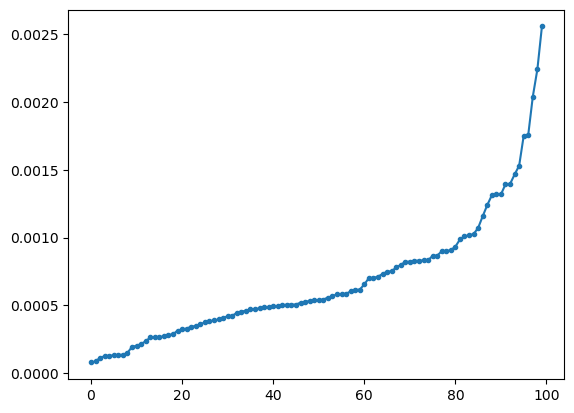

0.0016728603994359003 [-0.69018101  0.21861001 -0.00149447  0.22229302  0.17418353  0.48133319
 -0.2475002  -0.25511598  0.15492129  0.11866237]


In [95]:
N = len(X0)
alpha = (N - 15) / N
print(alpha)
wma = af.averaging_function("WM", rhofunc=func.Sqrt(0.1), alpha=alpha)
a3, L3 = pca.find_rob_pc(X3, wma)
plt.plot(sorted(pca.distance_line(X3, a3)), marker='o', markersize=3)
plt.show()
print(L3, a3)
U3 = pca.project_line(X3, a3)
U3_0 = pca.project_line(X3_0, a3_0)

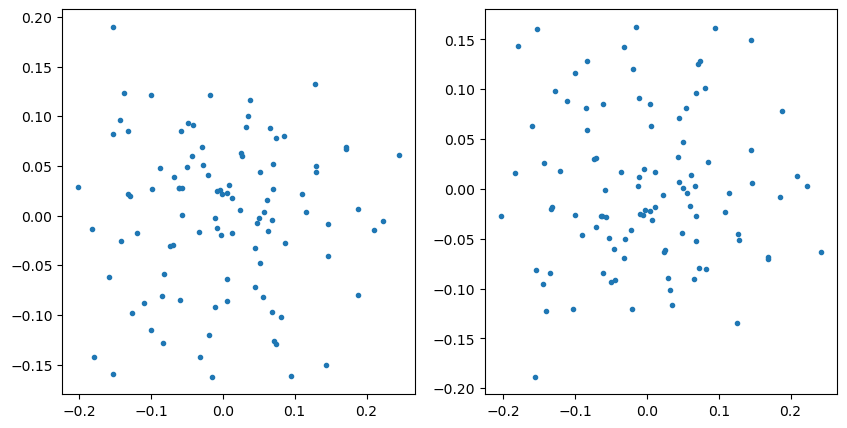

In [96]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.scatter(U1, U2, s=9)
plt.subplot(1,2,2)
plt.scatter(U1_0, U2_0, s=9)
plt.show()

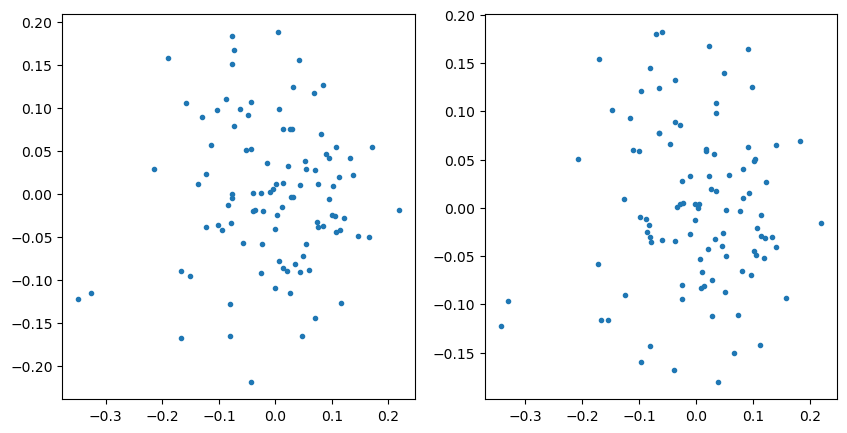

In [79]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.scatter(U1, U3, s=9)
plt.subplot(1,2,2)
plt.scatter(U1_0, U3_0, s=9)
plt.show()

In [49]:
from mlgrad.pca.location_scatter import robust_scatter_matrix

In [17]:
wma = af.averaging_function("WM", rhofunc=func.Sqrt(0.01), alpha=0.88)
S = robust_scatter_matrix(X1, wma)
print(S)

[[ 2.36012828 -1.62387129 -2.02216981  2.03484851]
 [-1.62387129  2.87189846  1.86640493 -2.19520502]
 [-2.02216981  1.86640493  2.65727801 -3.79175185]
 [ 2.03484851 -2.19520502 -3.79175185  6.638786  ]]


In [18]:
L, A = np.linalg.eig(S)
print(A)

[[ 0.34170194 -0.49165116  0.6997444  -0.38971361]
 [-0.36335242  0.64466025  0.66901205  0.06936181]
 [-0.47941797  0.04055323 -0.21124667 -0.85081648]
 [ 0.72206178  0.58399292 -0.13474238 -0.34557712]]
